In [26]:
from tensorflow.keras.models import load_model, model_from_json
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

plt.style.use('dark_background')

In [28]:
dat = os.path.join('spiral_Augument/healthy/')
lis = os.listdir(dat)

print(len(lis))

15066


In [5]:
! ls models


3_spiral_model.h5 3_wave_model.h5   model             model2


In [7]:
json_file = open('models/model2/model_structure.json','r')
model_structure = json_file.read()
json_file.close()

model = model_from_json(model_structure)

model.load_weights('models/model2/model_weights.h5')

In [51]:
!ls spiral_processed/test/healthy

healthy_V01HE01_0_2830.jpg healthy_V09HE02_0_313.jpg
healthy_V01HE01_0_4663.jpg healthy_V09HE02_0_5163.jpg
healthy_V01HE01_0_4676.jpg healthy_V09HE02_0_6127.jpg
healthy_V01HE01_0_6497.jpg healthy_V09HE02_0_6735.jpg
healthy_V01HE01_0_8059.jpg healthy_V09HE02_0_8462.jpg
healthy_V01HE01_0_8305.jpg healthy_V09HE03_0_1626.jpg
healthy_V01HE01_0_9834.jpg healthy_V09HE03_0_3176.jpg
healthy_V01HE02_0_1307.jpg healthy_V09HE03_0_3807.jpg
healthy_V01HE02_0_2961.jpg healthy_V09HE03_0_5101.jpg
healthy_V01HE02_0_3912.jpg healthy_V09HE03_0_5292.jpg
healthy_V01HE02_0_4448.jpg healthy_V09HE03_0_5911.jpg
healthy_V01HE02_0_5595.jpg healthy_V09HE03_0_6231.jpg
healthy_V01HE02_0_5767.jpg healthy_V09HE03_0_6968.jpg
healthy_V01HE02_0_6859.jpg healthy_V09HE03_0_7846.jpg
healthy_V01HE02_0_744.jpg  healthy_V09HE03_0_7888.jpg
healthy_V01HE02_0_751.jpg  healthy_V09HE03_0_8357.jpg
healthy_V01HE02_0_7778.jpg healthy_V10HE01_0_2271.jpg
healthy_V01HE02_0_8268.jpg healthy_V10HE01_0_4343.jpg
healthy_V01HE02_0_8532.jpg he

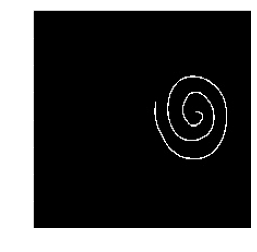

/Users/mahimairaja/Desktop/without.jpg


In [8]:
cur_dir = os.getcwd()
img_path = os.path.join('/Users/mahimairaja/Desktop/without.jpg')

img = cv2.imread(img_path)

plt.imshow(img)
plt.show()

print(img_path)

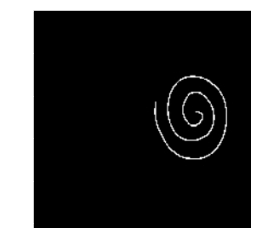

In [9]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [10]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.9556773]]


In [11]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person may have parkinson


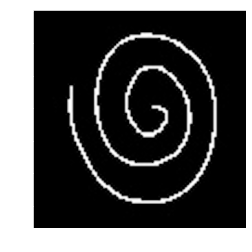

/Users/mahimairaja/Desktop/with.png


In [8]:
cur_dir = os.getcwd()
img_path = os.path.join('/Users/mahimairaja/Desktop/with.png')

img = cv2.imread(img_path)

plt.imshow(img)
plt.show()

print(img_path)

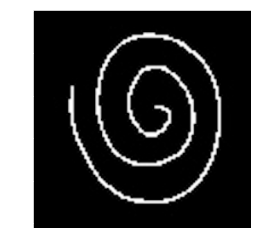

In [9]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [10]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.9893557]]


In [11]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person may have parkinson


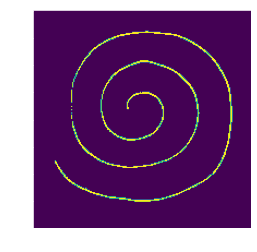

/Users/mahimairaja/Desktop/test2.png


In [14]:
cur_dir = os.getcwd()
img_path = os.path.join('/Users/mahimairaja/Desktop/test2.png')

img = cv2.imread(img_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (200, 200))
img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cv2.imwrite('/Users/mahimairaja/Desktop/tes2.png', img)


plt.imshow(img)
plt.show()

print(img_path)

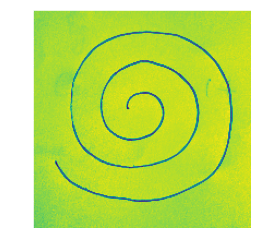

/Users/mahimairaja/Desktop/test2.png


In [18]:
cur_dir = os.getcwd()
img_path = os.path.join('/Users/mahimairaja/Desktop/test2.png')

img = cv2.imread(img_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(image, (200, 200))
cv2.imwrite('/Users/mahimairaja/Desktop/te2.png', img)

plt.imshow(img)
plt.show()

print(img_path)

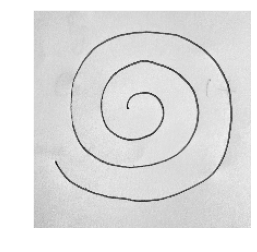

In [20]:
cur_dir = os.getcwd()
img_path = os.path.join('/Users/mahimairaja/Desktop/te2.png')

img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

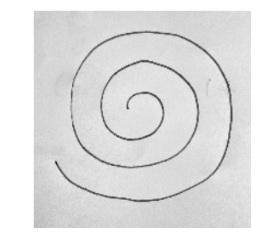

In [22]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [23]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.9707291]]


In [24]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person may have parkinson
